In [2]:
# 用户流失预测应用于分析
# 倒库
import pandas as pd
from sklearn.model_selection import  train_test_split   #数据分区库
import xgboost as xgb
from sklearn.metrics import  accuracy_score,auc ,confusion_matrix,f1_score,precision_score,recall_score,roc_curve
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
# - 用Pandas做数据读取和基本处理
# - 用sklearn的train_test_split实现切分数据集为训练集和预测集
# - XGBoost的分类算法用于模型训练和规则提取
# - 用sklearn.metrics中的多个评估指标评估XGboost模型的效果
# - imblearn.over_sampling中的SMOTE库做样本均衡处理
# - 用Matplotlib做图形输出，该库实际上是配合使用。
# - GraphViz本身是一个非常强大的、矢量图输出的第三方程序，它也为Python提供图形接口。它会用来与XGBoost的to_graphviz方法配合实现树形图输出


In [3]:

# 读取数据
data = pd.read_csv('classification2.csv', delimiter=',')
# 分割XY
x,y = data.iloc[:,:-1],data.iloc[:,-1]
# 数据的基本审查
samples,features = x.shape   #样本总量  总的特征数
print('samples: {0}| features: {1} | na count: {2}'.format(samples, features,data.isnull().any().count()))
(y==1).sum()

samples: 1000| features: 41 | na count: 42


274

In [6]:

# 数据预处理
# 填充缺失值
x = x.fillna(x.mean())
# 样本均衡处理
smote = SMOTE()
x,y = smote.fit_sample(x,y)
(y==1).sum()  
(y==0).sum() #  变成726  因为已经填充完毕了



726

In [7]:
x = pd.DataFrame(x,columns=data.columns[:-1])
# 数据分为训练集和测试集
x_train,x_text ,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=0)

In [8]:
param_dist = {'objective': 'binary:logistic', 'n_estimators': 10,
              'subsample': 0.8, 'max_depth': 10, 'n_jobs': -1}

In [9]:
model_xgb = xgb.XGBClassifier(**param_dist)
model_xgb.fit(x_train,y_train)
pre_y = model_xgb.predict(x_text)

In [10]:
# 获得混淆矩阵
tn, fp,fn, tp = confusion_matrix(y_test,pre_y).ravel()
pd.DataFrame([[tp,fn],[fp,tn]],columns = ['0','1'],index = ['0','1'])



,0,1
0,177,37
1,52,170


In [14]:
# 获得混淆矩阵
# 核心评估指标
 # 获得决策树的预测概率
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])  # ROC
auc_s = auc(fpr, tpr)  # AUC
scores = [round(i(y_test, pre_y),3 )for  i in (accuracy_score,precision_score,recall_score,f1_score)]
scores.insert(0,auc_s)
pd.DataFrame([scores],columns=['auc', 'accuracy', 'precision', 'recall', 'f1'])

,auc,accuracy,precision,recall,f1
0,0.843942,0.796,0.773,0.827,0.799


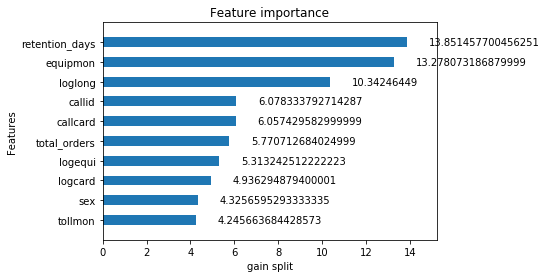

In [16]:
# 输出可视化结果  输出的是特征重要性
xgb.plot_importance(model_xgb,height = 0.5,importance_type = 'gain',max_num_features = 10,xlabel = 'gain split',grid = False)


In [17]:
# xgb.to_graphviz(model_xgb, num_trees=1, yes_color='#638e5e', no_color='#a40000') 

ImportError: You must install graphviz to plot tree